##Parte 1

###Ejercicio 1

In [3]:
# Importamos los paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
pd.options.display.float_format = '{:,.2f}'.format




In [4]:
# Cargamos la base
df = pd.read_excel("eph_tp2.xlsx")
# Calculamos los adultos equivalentes por hogar
df['ad_equiv_hogar'] = df.groupby("CODUSU")["adulto_equiv"].transform("sum")

# Definimos la CBT por año
cbt = {2005: 205.07, 2025: 365177}
# Calculamos ingreso necesario por hogar
df['ingreso_necesario'] = df['ad_equiv_hogar'] * df['ANO4'].map(cbt)
# Creamos una columna que indique 1 si el individuo pertecene a un hogar pobre y 0 en caso contrario
df['pobre'] = (df['ITF'] < df['ingreso_necesario']).astype(int) # Primero nos devuelve true o false y lo convertimos a 1-0
# Reemplazamos la clasificación de pobre por nan para aquellas observaciones que tienen un ITF = 0
df.loc[df['ITF'] == 0, 'pobre'] = np.nan

In [5]:
# Creamos la variable de edad al cuadrado
df['edad2'] = df['CH06']**2

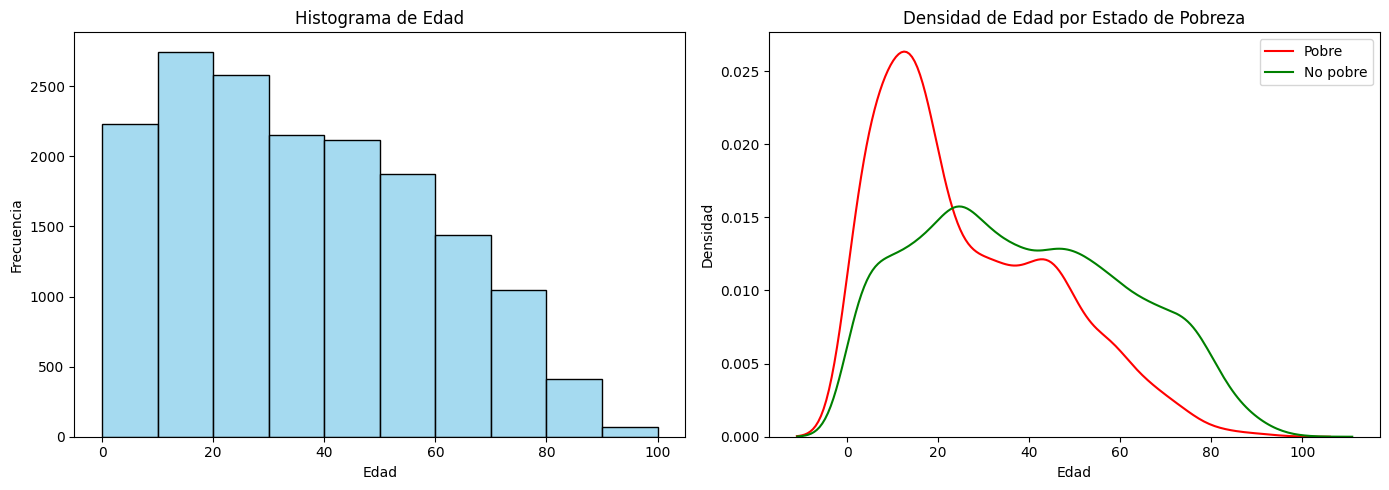

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Panel 1: Histograma de edad
sns.histplot(df['CH06'], bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Panel 2: Kernel density por grupo pobre / no pobre
sns.kdeplot(df.loc[df['pobre'] == 1, 'CH06'], label='Pobre', color='red', ax=axes[1])
sns.kdeplot(df.loc[df['pobre'] == 0, 'CH06'], label='No pobre', color='green', ax=axes[1])
axes[1].set_title('Densidad de Edad por Estado de Pobreza')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()

###Ejercicio 2

In [7]:
# Calculamos los años de educación
jardin = 2
primaria = 8 # Primaria Bsas (6+2)
egb = 11 # Jardin + 9 años egb (9+2)
secundaria = 14 # Jardin + primaria + secundaria 6 años
polimodal = 14 # Jardin + egb + polimodal 3 años
terciario = 17 # 14 de secundaria o polimodal + 3
universitario = 19 # 14 de secundaria o polimodal + 5
posgrado = 22 # 19 de universitario + 3 años
especial = 14


In [8]:
def calcular_educ(row):
    if row['CH12'] == 0 or row['CH12'] == 99: # No hay dato
        return np.nan
    elif row['CH13'] == 0 or row['CH13'] == 9 or row['CH13'] == 1: # Termino el nivel o no hay dato y asumimos que termino el nivel anterior
        if row['CH12'] == 1:
            return jardin
        elif row['CH12'] == 2:
            return primaria
        elif row['CH12'] == 3:
            return egb
        elif row['CH12'] == 4:
            return secundaria
        elif row['CH12'] == 5:
            return polimodal
        elif row['CH12'] == 6:
            return terciario
        elif row['CH12'] == 7:
            return universitario
        elif row['CH12'] == 8:
            return posgrado
        elif row['CH12'] == 9:
            return especial
    elif row['CH13'] == 2: # No Termino el nivel
        if ['CH14'] == 99 or row['CH14'] == 98:
            if row['CH12'] == 1:
                return jardin - 1
            elif row['CH12'] == 2:
                return primaria - 1
            elif row['CH12'] == 3:
                return egb - 1
            elif row['CH12'] == 4:
                return primaria - 1
            elif row['CH12'] == 5:
                return primaria - 1
            elif row['CH12'] == 6:
                return terciario - 1
            elif row['CH12'] == 7:
                return universitario - 1
            elif row['CH12'] == 8:
                return posgrado - 1
            elif row['CH12'] == 9:
                return especial - 1
        elif row['CH14'] == 0 or row['CH14'] == 1 or row['CH14'] == 2 or row['CH14'] == 3 or row['CH14'] == 4 or row['CH14'] == 5 or row['CH14'] == 6 or row['CH14'] == 7 or row['CH14'] == 8 or row['CH14'] == 9:
                if row['CH12'] == 1:
                    return row['CH14']
                elif row['CH12'] == 2:
                    return jardin + row['CH14']
                elif row['CH12'] == 3:
                    return jardin + row['CH14']
                elif row['CH12'] == 4:
                    return secundaria + row['CH14']
                elif row['CH12'] == 5:
                    return polimodal + row['CH14']
                elif row['CH12'] == 6:
                    return secundaria + row['CH14']
                elif row['CH12'] == 7:
                    return secundaria + row['CH14']
                elif row['CH12'] == 8:
                    return universitario + row['CH14']
                elif row['CH12'] == 9:
                    return row['CH14']

df['educ'] = df.apply(calcular_educ, axis=1)


In [9]:
df

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,P21,P47T,ITF,IPCF,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ
0,125098,1,1,1,2005,1,80,4,1,4,...,0,583,583,583,0.74,0.74,151.75,0.00,6400,16.00
1,125188,1,1,1,2005,1,26,2,4,4,...,300,450,450,150,1.02,2.13,436.80,0.00,676,14.00
2,125188,1,2,1,2005,2,27,2,4,6,...,0,0,450,150,0.76,2.13,436.80,0.00,729,17.00
3,125188,1,3,1,2005,2,0,5,4,99,...,0,0,450,150,0.35,2.13,436.80,0.00,0,NaN
4,125242,1,1,1,2005,2,71,4,1,2,...,0,855,855,855,0.67,0.67,137.40,0.00,5041,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,700000,700000,0,0,1.00,4.18,"1,526,439.86",NaN,2401,NaN
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,500000,500000,0,0,0.76,4.18,"1,526,439.86",NaN,2601,17.00
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,-9,-9,0,0,0.76,4.18,"1,526,439.86",NaN,484,17.00
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,0,0,0,0,1.02,4.18,"1,526,439.86",NaN,676,19.00


In [10]:
#presentamos una estadistica descriptiva para la variable educ
descriptive_stats = df['educ'].describe()
display(descriptive_stats)

,educ
count,"15,692.00"
mean,12.28
std,5.24
min,0.00
25%,8.00
50%,14.00
75%,17.00
max,24.00


**Comentarios sobre la variable 'educ'

La variable educ presenta una tendencia central en torno a la educación secundaria completa, con un alto nivel de dispersión y la existencia de personas que no han cursado educación formal así como otras que tienen estudios universitarios o de posgrado

###ejercicio 3

In [11]:
df_1=df.copy()

In [20]:
df_1['ITF_actualizado'] = np.where(
    df_1['ANO4'] == 2005,
    df_1['ITF'] *(165274.2/109.2),  # actualizar pesos (IPC2025,2004​/IPC2005,2004)	​
    df_1['ITF']  # si es 2025, dejar igual
)

# Actualizar la variable ingreso_total_familiar
df_1['ingreso_total_familiar'] = df_1['ITF_actualizado']

# Revisar resultado
print(df_1[['ANO4', 'ITF', 'ITF_actualizado', 'ingreso_total_familiar']].head())

   ANO4  ITF  ITF_actualizado  ingreso_total_familiar
0  2005  583       882,370.50              882,370.50
1  2005  450       681,075.00              681,075.00
2  2005  450       681,075.00              681,075.00
3  2005  450       681,075.00              681,075.00
4  2005  855     1,294,042.50            1,294,042.50


In [53]:
df_1['pobre_actualizado'] = (df_1['ITF_actualizado'] < df_1['ingreso_necesario_actualizado']).astype(int) # Primero nos devuelve true o false y lo convertimos a 1-0
# Reemplazamos la clasificación de pobre por nan para aquellas observaciones que tienen un ITF = 0
df_1.loc[df_1['ITF_actualizado'] == 0, 'pobre_actualizado'] = np.nan

In [50]:
#actualizar los ingrasos necesarios para los del 2005 con los del 2025
df_1["ingreso_necesario_actualizado"]= np.where(df_1["ANO4"]==2005,
                                                df_1["ingreso_necesario"]/205.07*365177,
                                                df_1["ingreso_necesario"])

In [54]:
df_1

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ,ITF_actualizado,ingreso_total_familiar,ingreso_necesario_actualizado,pobre_actualizado
0,125098,1,1,1,2005,1,80,4,1,4,...,0.74,0.74,151.75,0.00,6400,16.00,"882,370.50","882,370.50","270,230.98",0.00
1,125188,1,1,1,2005,1,26,2,4,4,...,1.02,2.13,436.80,0.00,676,14.00,"681,075.00","681,075.00","777,827.01",1.00
2,125188,1,2,1,2005,2,27,2,4,6,...,0.76,2.13,436.80,0.00,729,17.00,"681,075.00","681,075.00","777,827.01",1.00
3,125188,1,3,1,2005,2,0,5,4,99,...,0.35,2.13,436.80,0.00,0,NaN,"681,075.00","681,075.00","777,827.01",1.00
4,125242,1,1,1,2005,2,71,4,1,2,...,0.67,0.67,137.40,0.00,5041,8.00,"1,294,042.50","1,294,042.50","244,668.59",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,1.00,4.18,"1,526,439.86",NaN,2401,NaN,0.00,0.00,"1,526,439.86",NaN
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,0.76,4.18,"1,526,439.86",NaN,2601,17.00,0.00,0.00,"1,526,439.86",NaN
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,0.76,4.18,"1,526,439.86",NaN,484,17.00,0.00,0.00,"1,526,439.86",NaN
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,1.02,4.18,"1,526,439.86",NaN,676,19.00,0.00,0.00,"1,526,439.86",NaN


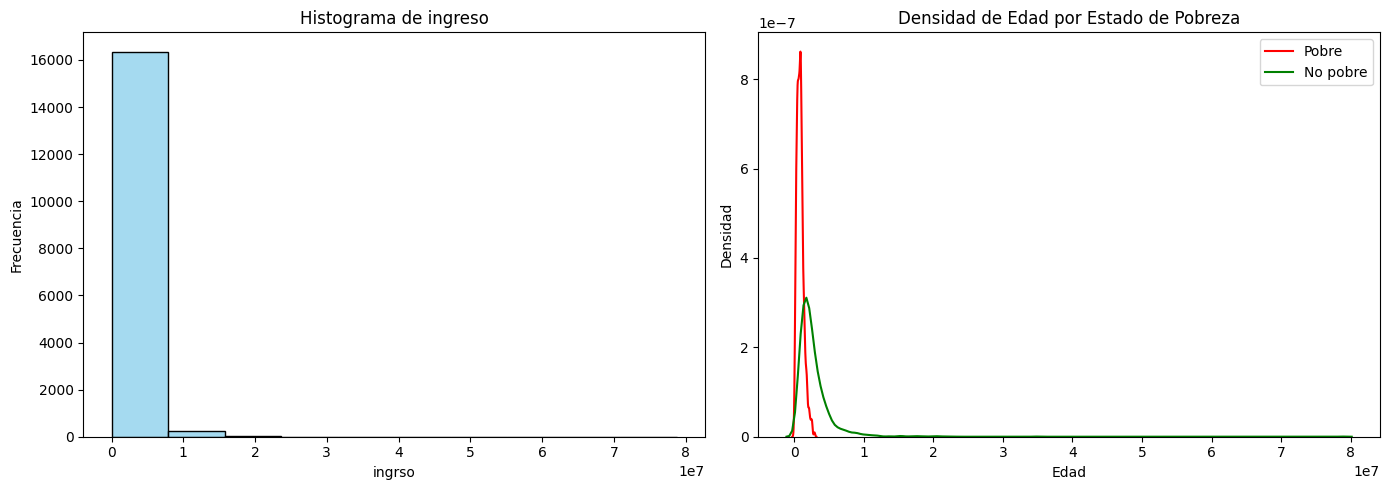

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Panel 1: Histograma de edad
sns.histplot(df_1['ingreso_total_familiar'], bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Histograma de ingreso')
axes[0].set_xlabel('ingrso')
axes[0].set_ylabel('Frecuencia')

# Panel 2: Kernel density por grupo pobre / no pobre
sns.kdeplot(df_1.loc[df_1['pobre_actualizado'] == 1, 'ingreso_total_familiar'], label='Pobre', color='red', ax=axes[1])
sns.kdeplot(df_1.loc[df_1['pobre_actualizado'] == 0, 'ingreso_total_familiar'], label='No pobre', color='green', ax=axes[1])
axes[1].set_title('Densidad de Edad por Estado de Pobreza')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()

### ejercicio 5 tabla de resumen


In [ ]:
#calculamos el total de observaciones y el numero de observaciones para cada año
total_observations = len(df_yyy)
total_obs_2005 = len(df_yyy[df_yyy['ANO4'] == 2005])
total_obs_2025 = len(df_yyy[df_yyy['ANO4'] == 2025])

NameError: name 'df_yyy' is not defined

In [ ]:
#calculamos el numero de valores fatantes en la columna pobre para todos los años
nan_pobre_total = df_yyy['pobre'].isnull().sum()
nan_pobre_2005 = df_yyy[df_yyy['ANO4'] == 2005]['pobre'].isnull().sum()
nan_pobre_2025 = df_yyy[df_yyy['ANO4'] == 2025]['pobre'].isnull().sum()

NameError: name 'df_yyy' is not defined

In [ ]:
#calculamos pobres y no pobres
#'pobre' es 1 (pobre) y 'pobre' es 0 (no pobre)
poor_total = df_yyy['pobre'].sum()
non_poor_total = (df_yyy['pobre'] == 0).sum()
poor_2005 = df_yyy[df_yyy['ANO4'] == 2005]['pobre'].sum()
non_poor_2005 = (df_yyy[df_yyy['ANO4'] == 2005]['pobre'] == 0).sum()
poor_2025 = df_yyy[df_yyy['ANO4'] == 2025]['pobre'].sum()
non_poor_2025 = (df_yyy[df_yyy['ANO4'] == 2025]['pobre'] == 0).sum()

In [ ]:
#contamos las variables limpias y homogeneizadas
cleaned_variables_count = 5

In [ ]:
#creamos una tabla de resumen
summary_data = {
    2005: [int(total_obs_2005), int(nan_pobre_2005), int(poor_2005), int(non_poor_2005), int(cleaned_variables_count)],
    2025: [int(total_obs_2025), int(nan_pobre_2025), int(poor_2025), int(non_poor_2025), int(cleaned_variables_count)],
    'Total': [int(total_observations), int(nan_pobre_total), int(poor_total), int(non_poor_total), int(cleaned_variables_count)]
}
summary_table = pd.DataFrame(summary_data, index=["Cantidad observaciones", "Cantidad de observaciones con NAs en la variable “Pobre”", "Cantidad de Pobres", "Cantidad de No Pobres", "Cantidad de variables limpias y homogeneizadas"])
display(summary_table)

,2005,2025,Total
Cantidad observaciones,9484,7181,16665
Cantidad de observaciones con NAs en la variable “Pobre”,113,2872,2985
Cantidad de Pobres,2532,1341,3873
Cantidad de No Pobres,6839,2968,9807
Cantidad de variables limpias y homogeneizadas,5,5,5
